In [8]:
import scipy as sp
import numpy as np
from skbio import DistanceMatrix,DNA,TreeNode 


def hamming_distance(sequence1, sequence2):
    n, m = len(sequence1), len(sequence2)
    return sum(sequence1[i] != sequence2[i] for i in range(min(n, m))) + abs(n-m)
def example_guide_tree_generation(sequences, metric=hamming_distance):
    guide_dm = DistanceMatrix.from_iterable(sequences, metric=metric, key='id')
    print(guide_dm)
    print(type(guide_dm))
    print(guide_dm.condensed_form())
    guide_lm = sp.cluster.hierarchy.average(guide_dm.condensed_form())
    print(guide_lm)
    print(type(guide_lm))
    guide_tree = TreeNode.from_linkage_matrix(guide_lm, guide_dm.ids)
    return guide_tree

# not the best thing out there 

In [9]:
query_of_sequences = [  DNA("ACGCGATGACCGGGCCTTGTA", metadata={'id': 'seq1'}),
                        DNA("ATGATGACAGGGCTTGTAACT", metadata={'id': 'seq2'}),
                        DNA("TTCATGACCGGCTTATACTTA", metadata={'id': 'seq3'}),
                        DNA("ACCCTACCTGTCGTATTGTAA", metadata={'id': 'seq4'}),
                      ]
result =example_guide_tree_generation(query_of_sequences)
result

4x4 distance matrix
IDs:
'seq1', 'seq2', 'seq3', 'seq4'
Data:
[[ 0. 21. 21. 21.]
 [21.  0. 21. 21.]
 [21. 21.  0. 21.]
 [21. 21. 21.  0.]]
<class 'skbio.stats.distance._base.DistanceMatrix'>
[21. 21. 21. 21. 21. 21.]
[[ 0.  1. 21.  2.]
 [ 2.  4. 21.  3.]
 [ 3.  5. 21.  4.]]
<class 'numpy.ndarray'>


<TreeNode, name: unnamed, internal node count: 2, tips count: 4>

In [11]:

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def get_linkage_matrix(model,verbose=True, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    if verbose:
        dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix


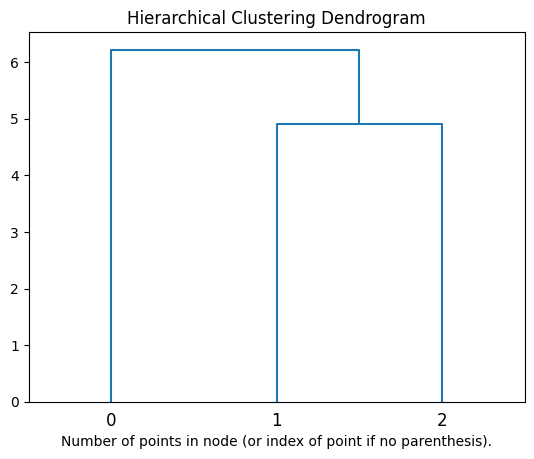

In [12]:
X = np.array([
    list('ACGCGATGACCGGGCCTTGTA'),
    list('ATGATGACAGGGCTTGTAACT'),
    list('TTCATGACCGGCTTATACTTA')
])

# one hot encode the data
X = np.array([[1 if x == y else 0 for x in 'ACGT'] for y in X.flatten()]).reshape(X.shape[0], -1)
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
linkage_mat = get_linkage_matrix(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()